# Lando Norris
<img src="https://www.formula1.com/content/fom-website/en/drivers/lando-norris/_jcr_content/image.img.1920.medium.jpg/1646819013197.jpg" width="300">

### Team: McLaren

<img src ="https://www.formula1.com/content/fom-website/en/drivers/lando-norris/_jcr_content/helmet.img.png/1646824749193.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

nor_laps <- lap_data %>%
            filter(driverId == 846)

# Filtering Lap Data for MCLAREN
mcl_lap <- lap_data %>%
             filter(driverId %in% c(838))

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


raceId,n
<dbl>,<int>
1011,57
1045,57
1052,56


`geom_smooth()` using formula 'y ~ x'



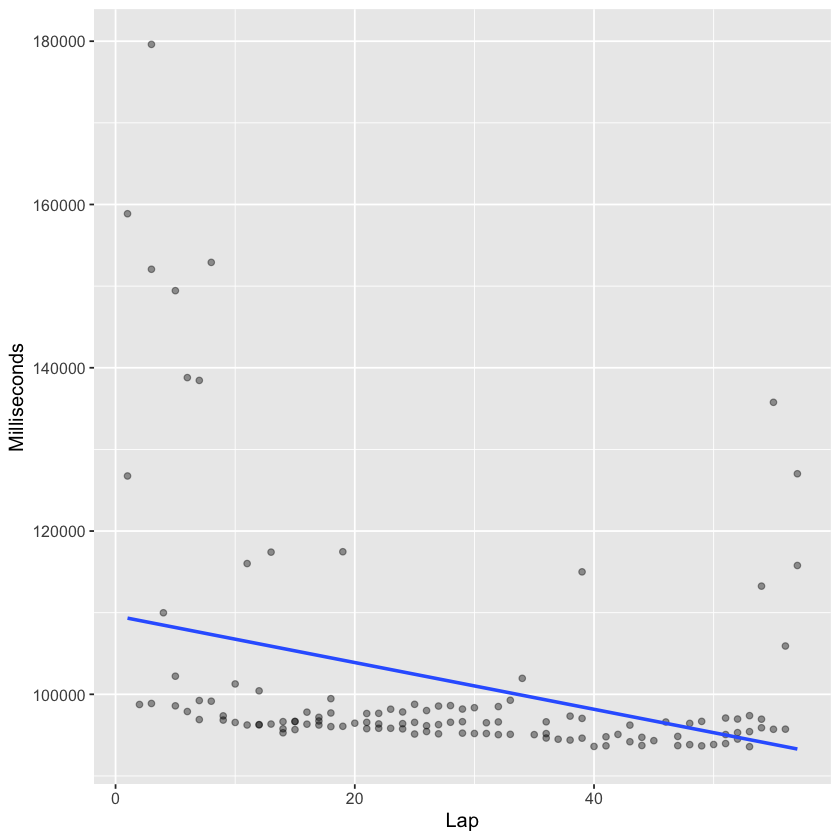

In [5]:
set.seed(2022)

#1. Bahrain

ln_bahrain <- nor_laps %>%
                filter(raceId %in% bahrain_race_ID) 

ln_bahrain_clean <- ln_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ln_bahrain_clean
ln_bahrain_clean_ID <- ln_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_bahrain_races <- nor_laps %>%
                    filter(raceId %in% ln_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1054,66
1042,65


`geom_smooth()` using formula 'y ~ x'



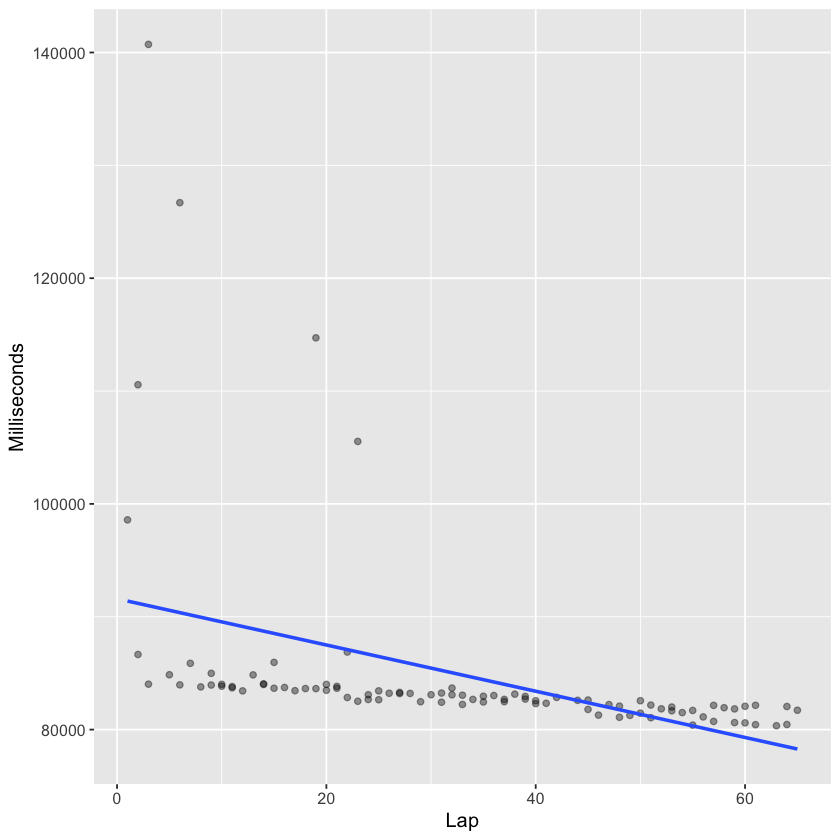

In [6]:
set.seed(2022)

#2. Portimão

ln_Portimão <- nor_laps %>%
                filter(raceId %in% Portimão_race_ID) 

ln_Portimão_clean <- ln_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_Portimão_clean
ln_Portimão_clean_ID <- ln_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_Portimão_races <- nor_laps %>%
                    filter(raceId %in% ln_Portimão_clean_ID) 

formulaone_split <- initial_split(ln_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
1010,57


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



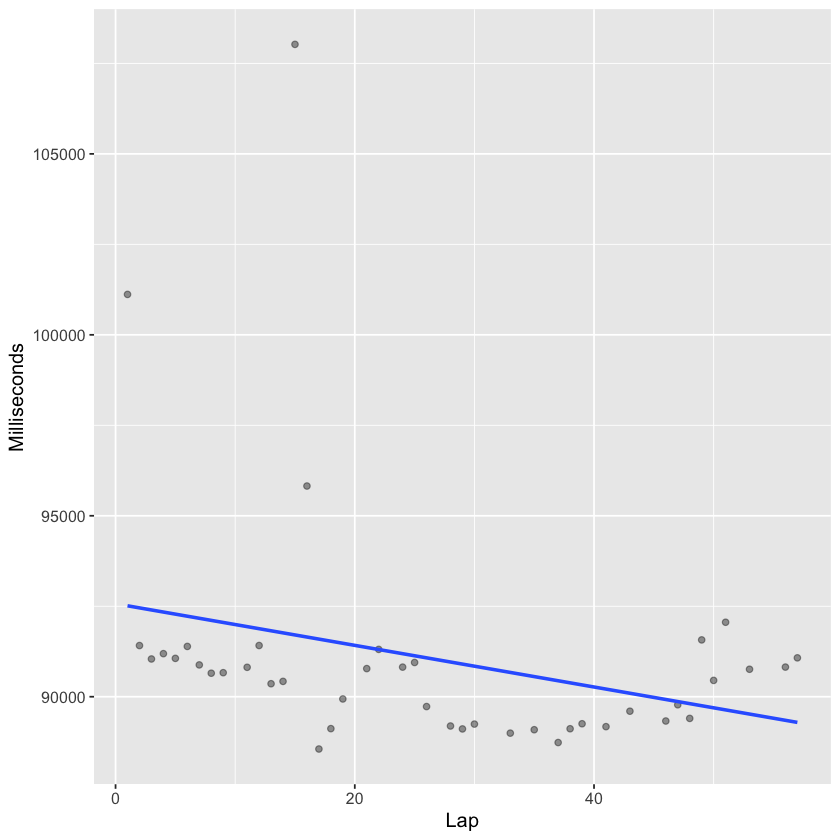

In [7]:
set.seed(2022)

#3.  Australia

ln_aus <- nor_laps %>%
                filter(raceId %in% aus_race_ID) 

ln_aus_clean <- ln_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_aus_clean
ln_aus_clean_ID <- ln_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_aus_races <- nor_laps %>%
                    filter(raceId %in% ln_aus_clean_ID)

formulaone_split <- initial_split(ln_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



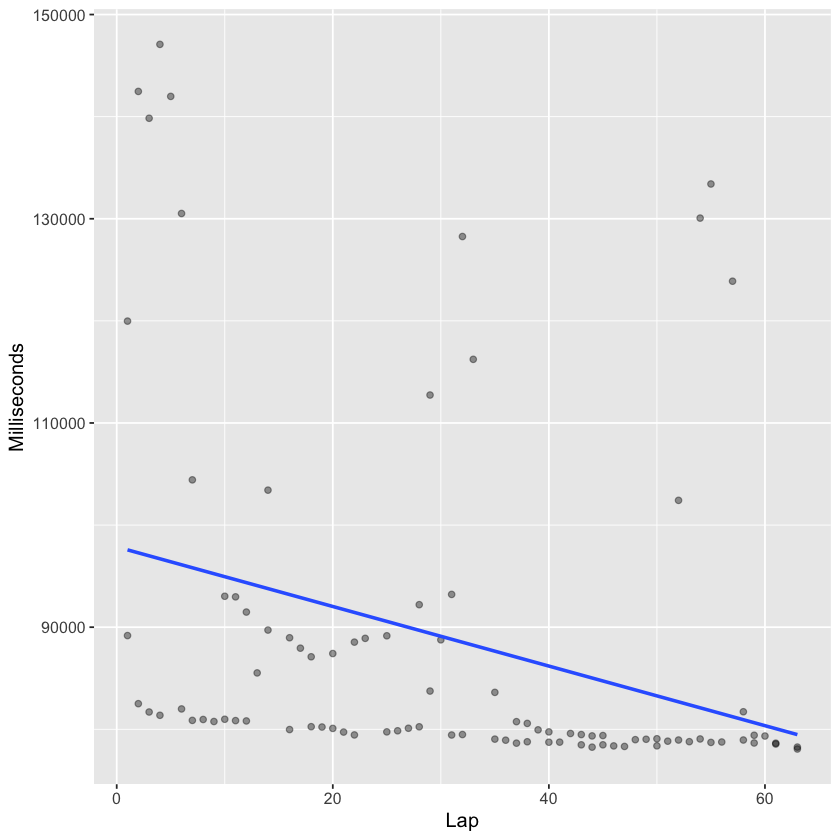

In [8]:
set.seed(2022)

#4.  Italy, Imola

ln_imola <- nor_laps %>%
                filter(raceId %in% imola_race_ID) 

ln_imola_clean <- ln_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_imola_clean
ln_imola_clean_ID <- ln_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_imola_races <- nor_laps %>%
                    filter(raceId %in% ln_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



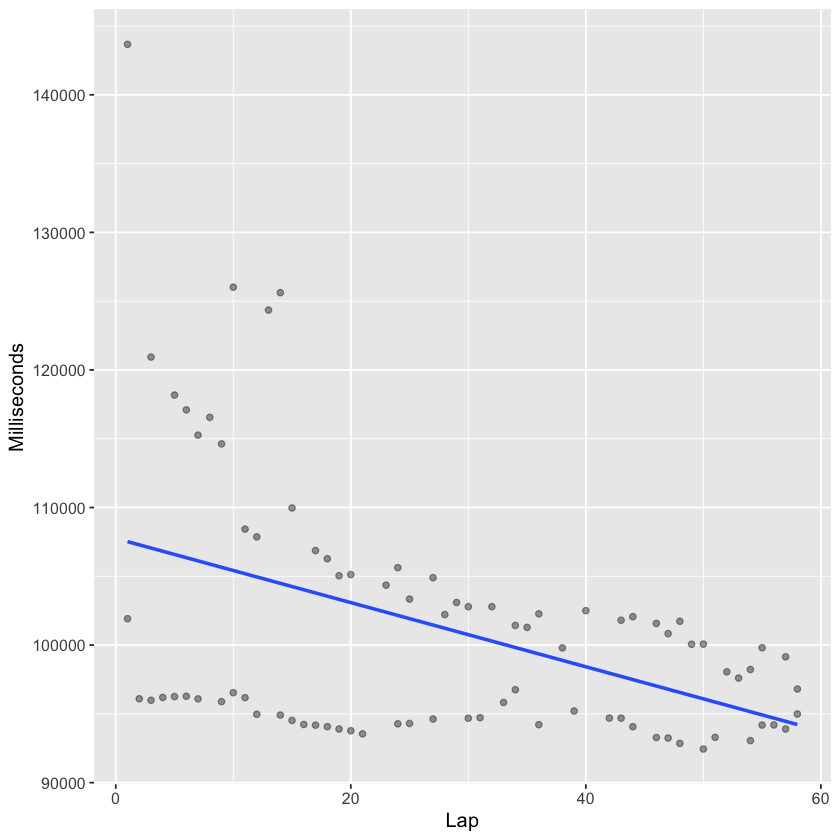

In [9]:
set.seed(2022)

#5.  Turkey (Replacing Miami)

ln_turkey <- nor_laps %>%
                filter(raceId %in% turkey_race_ID) 

ln_turkey_clean <- ln_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_turkey_clean
ln_turkey_clean_ID <- ln_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_turkey_races <- nor_laps %>%
                    filter(raceId %in% ln_turkey_clean_ID) 

formulaone_split <- initial_split(ln_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
1036,65
1055,65
1014,44


`geom_smooth()` using formula 'y ~ x'



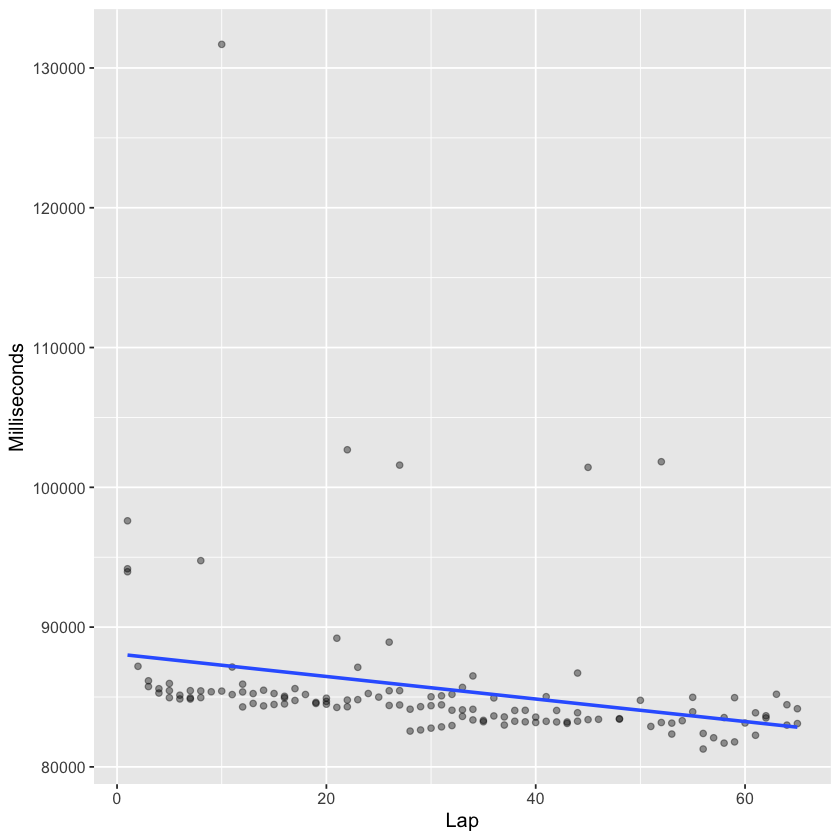

In [10]:
set.seed(2022)

#6.  Spain

ln_spain <- nor_laps %>%
                filter(raceId %in% spain_race_ID) 

ln_spain_clean <- ln_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_spain_clean
ln_spain_clean_ID <- ln_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_spain_races <- nor_laps %>%
                    filter(raceId %in% ln_spain_clean_ID)

formulaone_split <- initial_split(ln_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
1015,78
1056,78


`geom_smooth()` using formula 'y ~ x'



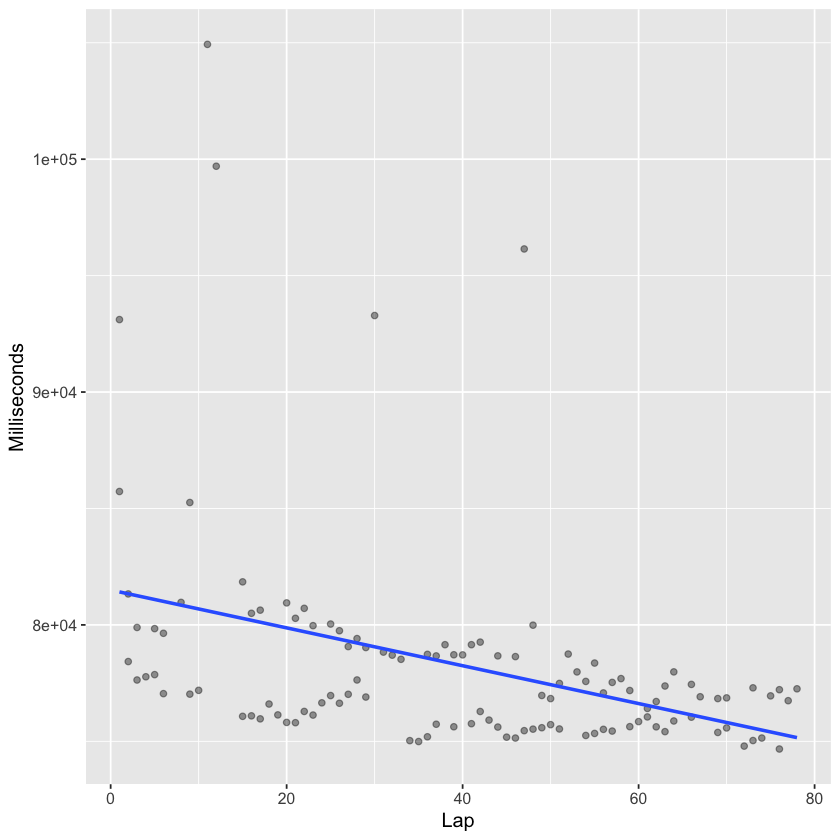

In [11]:
set.seed(2022)

#7.   Monaco

ln_monaco <- nor_laps %>%
                filter(raceId %in% monaco_race_ID) 

ln_monaco_clean <- ln_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_monaco_clean
ln_monaco_clean_ID <- ln_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_monaco_races <- nor_laps %>%
                    filter(raceId %in% ln_monaco_clean_ID)

formulaone_split <- initial_split(ln_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
1013,51
1057,51


`geom_smooth()` using formula 'y ~ x'



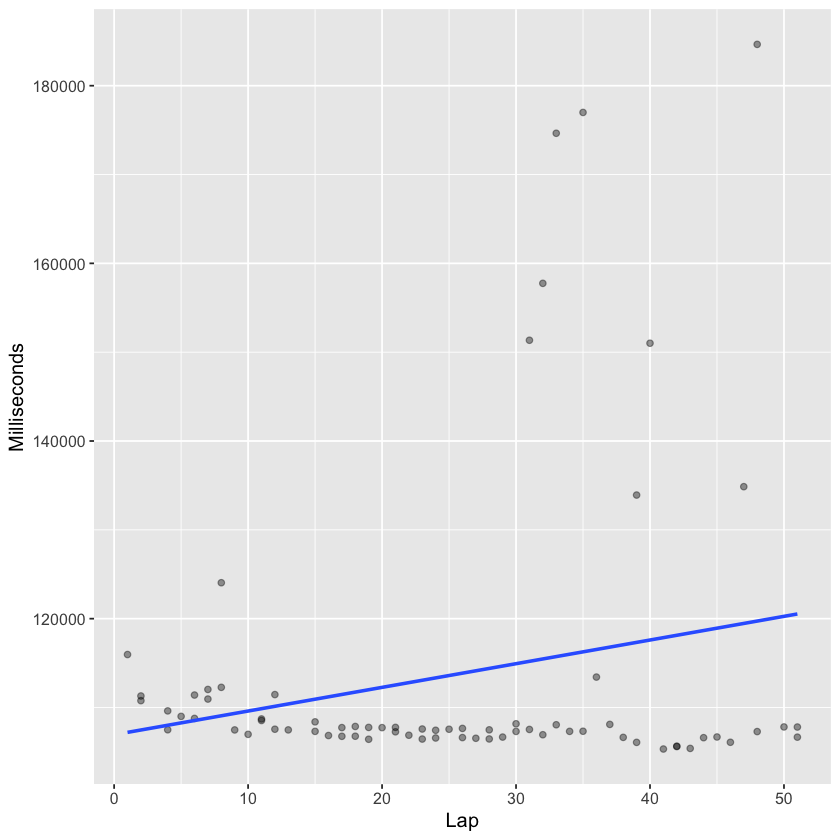

In [12]:
set.seed(2022)

#8.  Azerbaijan

ln_azerbaijan <- nor_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

ln_azerbaijan_clean <- ln_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_azerbaijan_clean
ln_azerbaijan_clean_ID <- ln_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_azerbaijan_races <- nor_laps %>%
                    filter(raceId %in% ln_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
975,69
995,66


`geom_smooth()` using formula 'y ~ x'



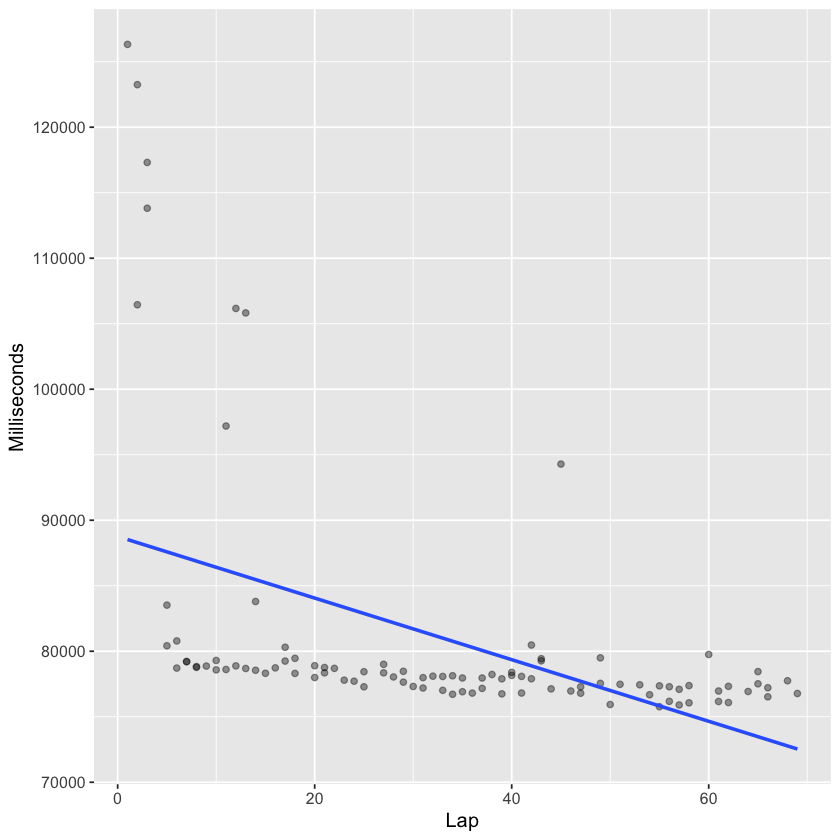

In [13]:
set.seed(2022)

#9.  Canada

ln_canada <- mcl_lap %>%
                filter(raceId %in% canada_race_ID) 

ln_canada_clean <- ln_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_canada_clean
ln_canada_clean_ID <- ln_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_canada_races <- mcl_lap %>%
                    filter(raceId %in% ln_canada_clean_ID)

formulaone_split <- initial_split(ln_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`geom_smooth()` using formula 'y ~ x'



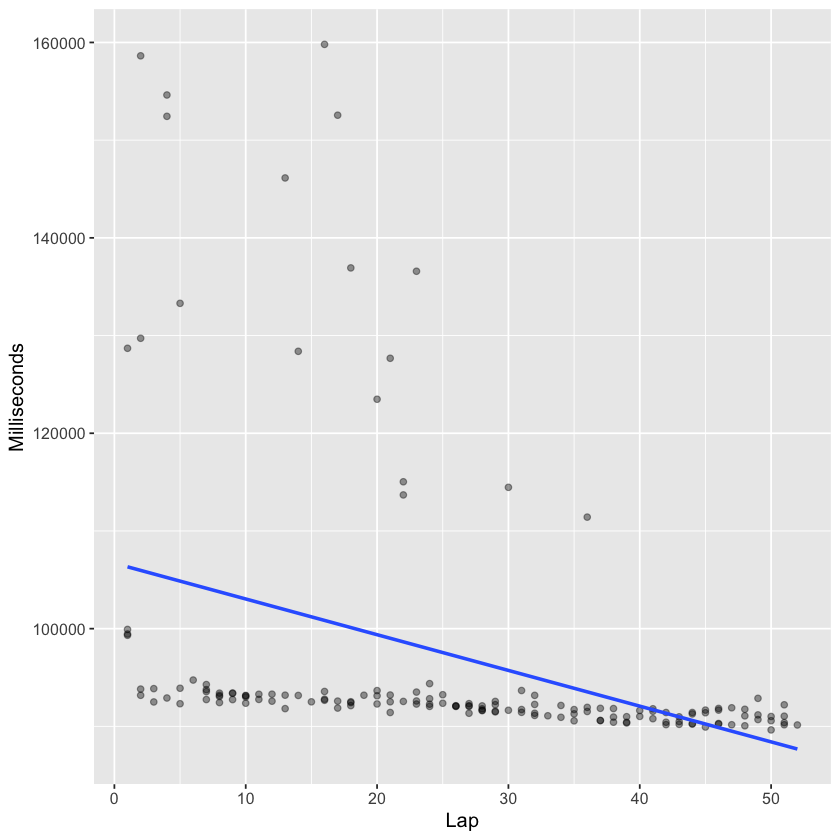

In [14]:
set.seed(2022)

#10.  Great Britain

ln_uk <- nor_laps %>%
                filter(raceId %in% uk_race_ID) 

ln_uk_clean <- ln_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_uk_clean_ID <- ln_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_uk_races <- nor_laps %>%
                    filter(raceId %in% ln_uk_clean_ID) 

formulaone_split <- initial_split(ln_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`geom_smooth()` using formula 'y ~ x'



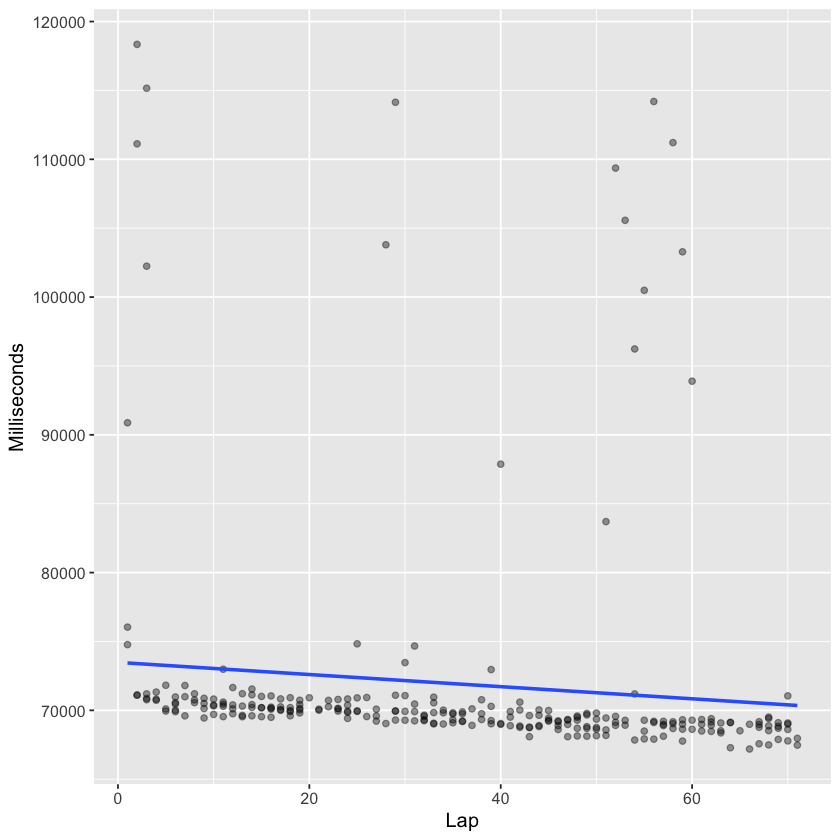

In [15]:
set.seed(2022)

#11.  Austria

ln_austria <- nor_laps %>%
                filter(raceId %in% austria_race_ID) 

ln_austria_clean <- ln_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_austria_clean_ID <- ln_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_austria_races <- nor_laps %>%
                    filter(raceId %in% ln_austria_clean_ID)

formulaone_split <- initial_split(ln_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
1059,53
1017,52


`geom_smooth()` using formula 'y ~ x'



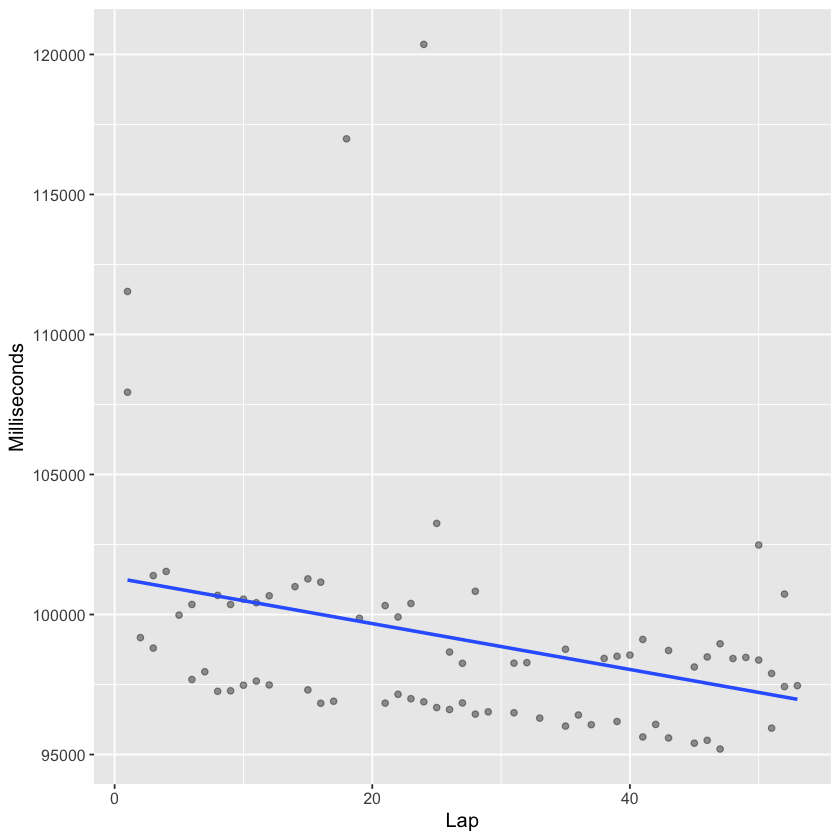

In [16]:
set.seed(2022)

#12. France

ln_france <- nor_laps %>%
                filter(raceId %in% france_race_ID) 

ln_france_clean <- ln_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_france_clean
ln_france_clean_ID <- ln_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_france_races <- nor_laps %>%
                    filter(raceId %in% ln_france_clean_ID) 

formulaone_split <- initial_split(ln_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`geom_smooth()` using formula 'y ~ x'



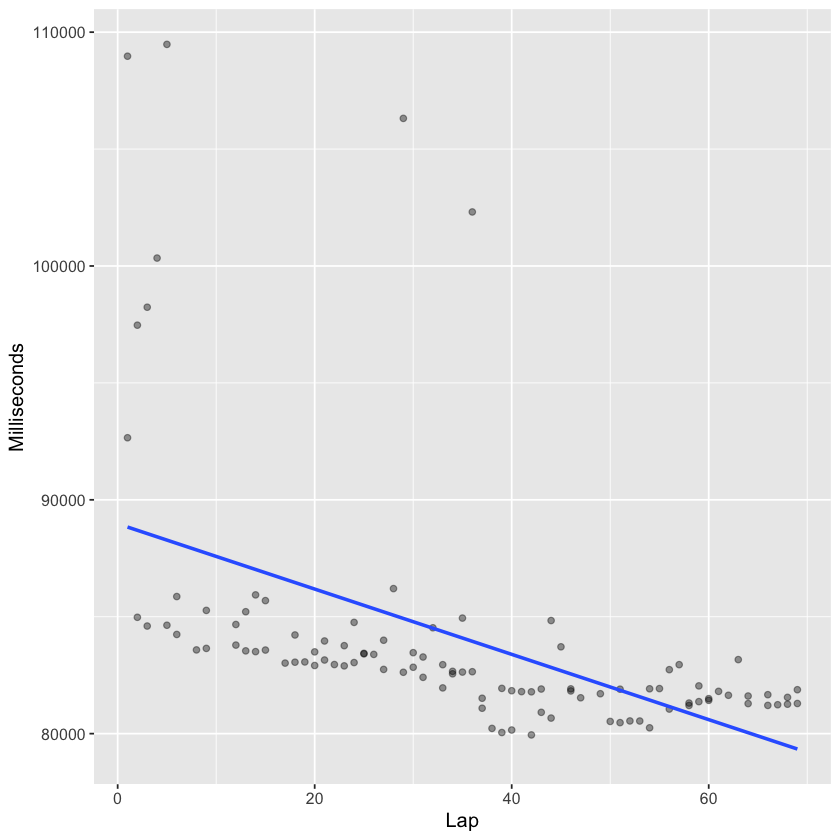

In [17]:
set.seed(2022)

#13.  Hungary

ln_hungary <- nor_laps %>%
                filter(raceId %in% hungary_race_ID) 

ln_hungary_clean <- ln_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

ln_hungary_clean_ID <- ln_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_hungary_races <- nor_laps %>%
                    filter(raceId %in% ln_hungary_clean_ID)

formulaone_split <- initial_split(ln_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
1037,44
1022,43
1063,1


`geom_smooth()` using formula 'y ~ x'



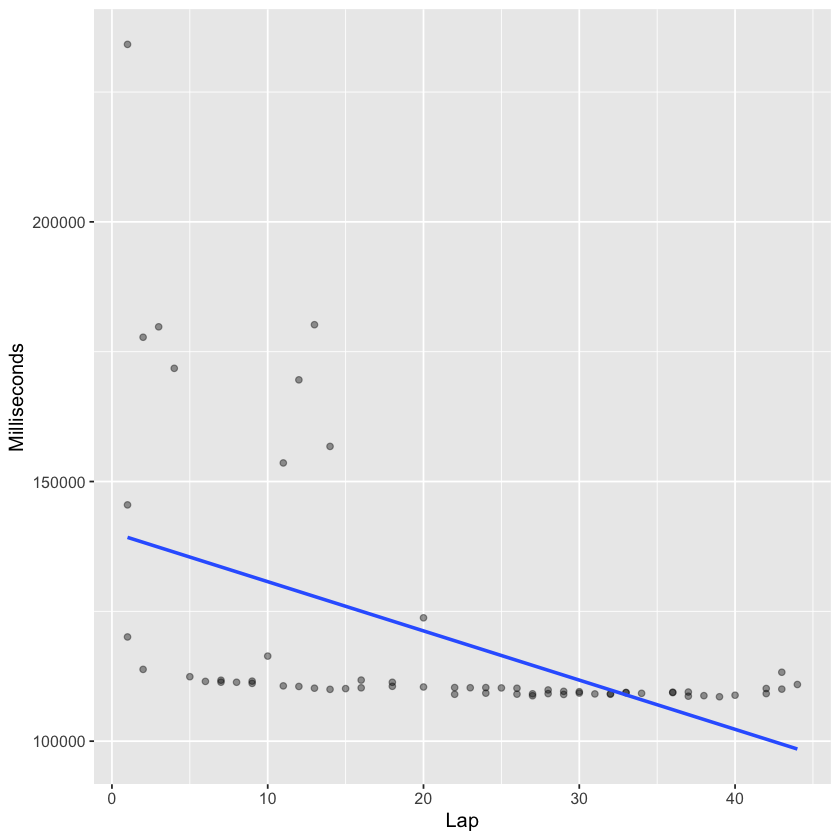

In [18]:
set.seed(2022)

#14.  Belgium

ln_belgium <- nor_laps %>%
                filter(raceId %in% belgium_race_ID) 

ln_belgium_clean <- ln_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_belgium_clean
ln_belgium_clean_ID <- ln_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_belgium_races <- nor_laps %>%
                    filter(raceId %in% ln_belgium_clean_ID)

formulaone_split <- initial_split(ln_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



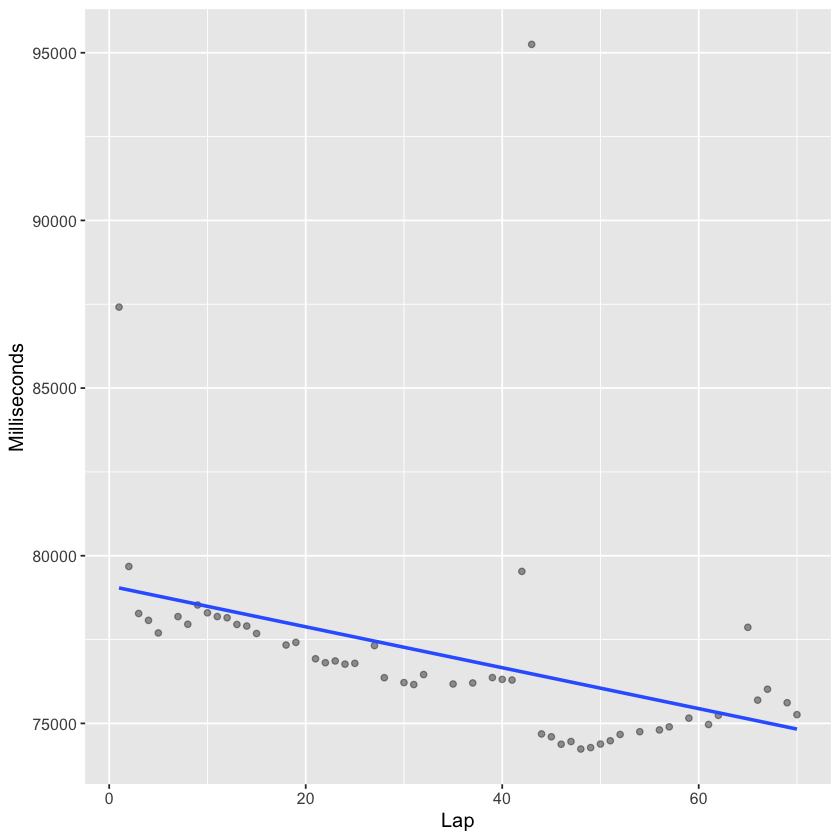

In [19]:
set.seed(2022)

#15.  Netherlands

ln_netherlands <- nor_laps %>%
                filter(raceId %in% netherlands_race_ID) 

ln_netherlands_clean <- ln_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_netherlands_clean
ln_netherlands_clean_ID <- ln_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_netherlands_races <- nor_laps %>%
                    filter(raceId %in% ln_netherlands_clean_ID)

formulaone_split <- initial_split(ln_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
1038,53
1065,53
1023,52


`geom_smooth()` using formula 'y ~ x'



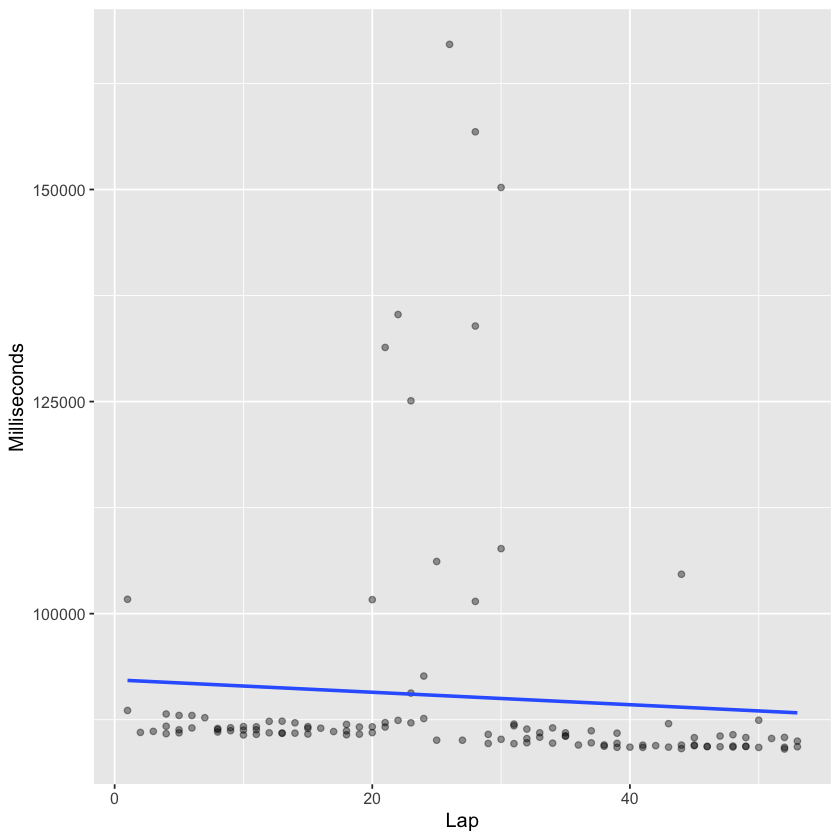

In [20]:
set.seed(2022)

#16.  Italy, Monza

ln_monza <- nor_laps %>%
                filter(raceId %in% monza_race_ID) 

ln_monza_clean <- ln_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ln_monza_clean
ln_monza_clean_ID <- ln_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_monza_races <- nor_laps %>%
                    filter(raceId %in% ln_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



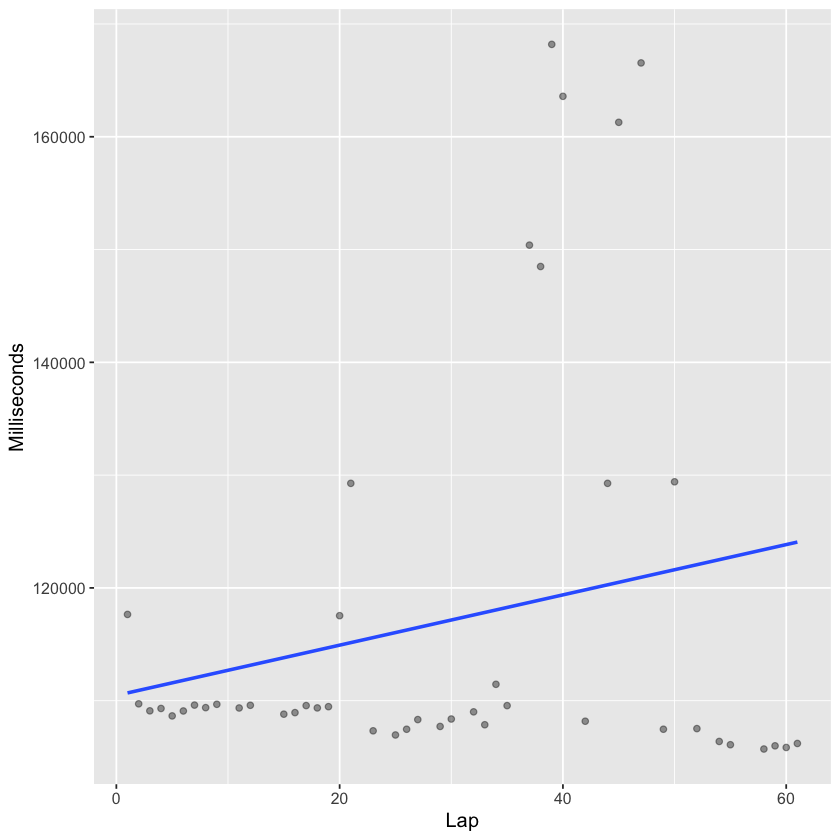

In [21]:
set.seed(2022)

#17.  Singapore

ln_singapore <- nor_laps %>%
                filter(raceId %in% singapore_race_ID) 

ln_singapore_clean <- ln_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_singapore_clean_ID <- ln_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_singapore_races <- nor_laps %>%
                    filter(raceId %in% ln_singapore_clean_ID)

formulaone_split <- initial_split(ln_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



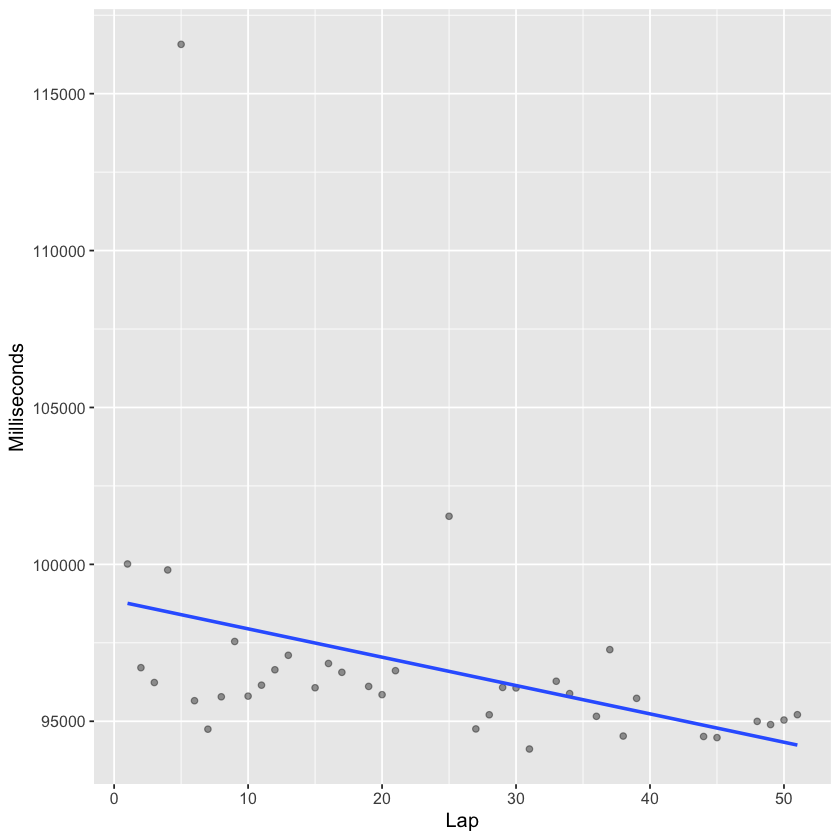

In [22]:
set.seed(2022)

#18.  Japan

ln_japan <- nor_laps %>%
                filter(raceId %in% japan_race_ID) 

ln_japan_clean <- ln_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_japan_clean_ID <- ln_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_japan_races <- nor_laps %>%
                    filter(raceId %in% ln_japan_clean_ID)

formulaone_split <- initial_split(ln_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`geom_smooth()` using formula 'y ~ x'



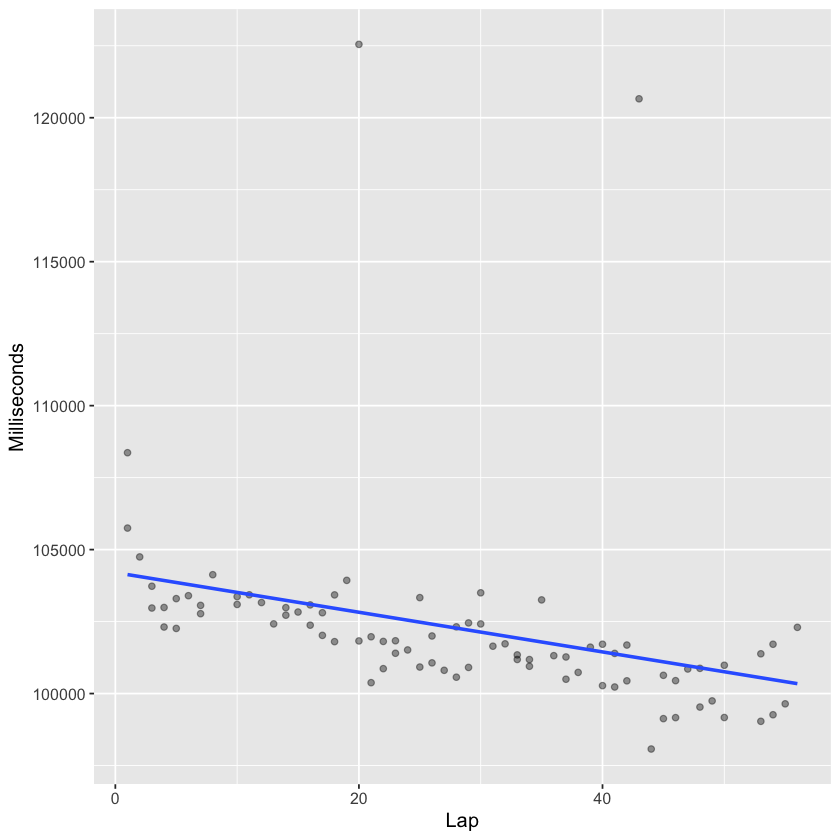

In [23]:
set.seed(2022)

#19.  USA, Austin

ln_austin <- nor_laps %>%
                filter(raceId %in% austin_race_ID) 

ln_austin_clean <- ln_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_austin_clean_ID <- ln_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_austin_races <- nor_laps %>%
                    filter(raceId %in% ln_austin_clean_ID)

formulaone_split <- initial_split(ln_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`geom_smooth()` using formula 'y ~ x'



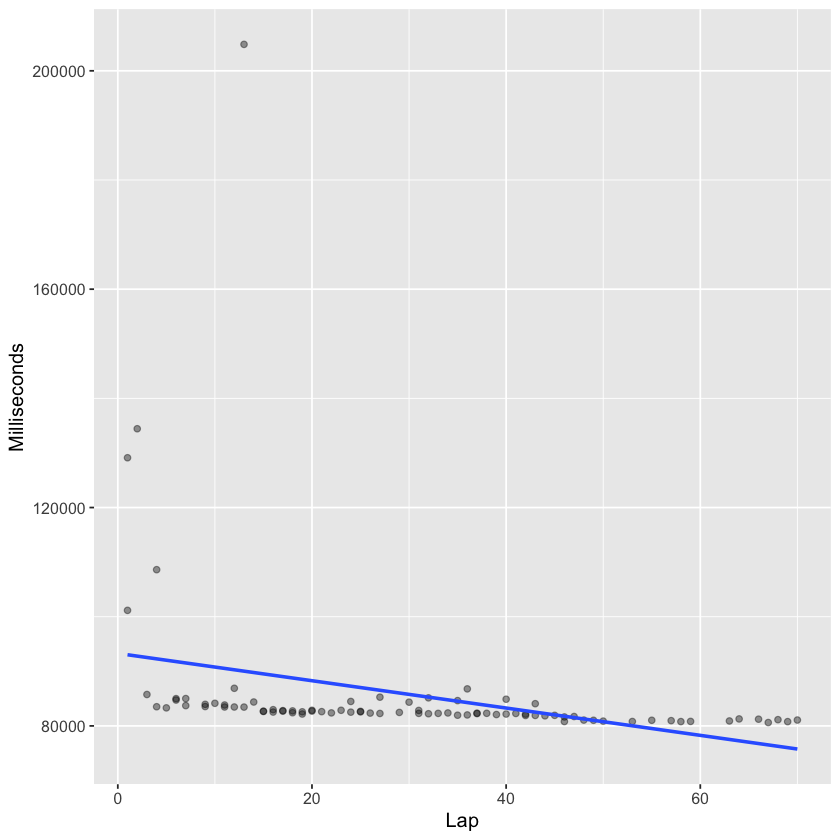

In [24]:
set.seed(2022)

#20.  Mexico

ln_mexico <- nor_laps %>%
                filter(raceId %in% mexico_race_ID) 

ln_mexico_clean <- ln_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_mexico_clean_ID <- ln_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_mexico_races <- nor_laps %>%
                    filter(raceId %in% ln_mexico_clean_ID)

formulaone_split <- initial_split(ln_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`geom_smooth()` using formula 'y ~ x'



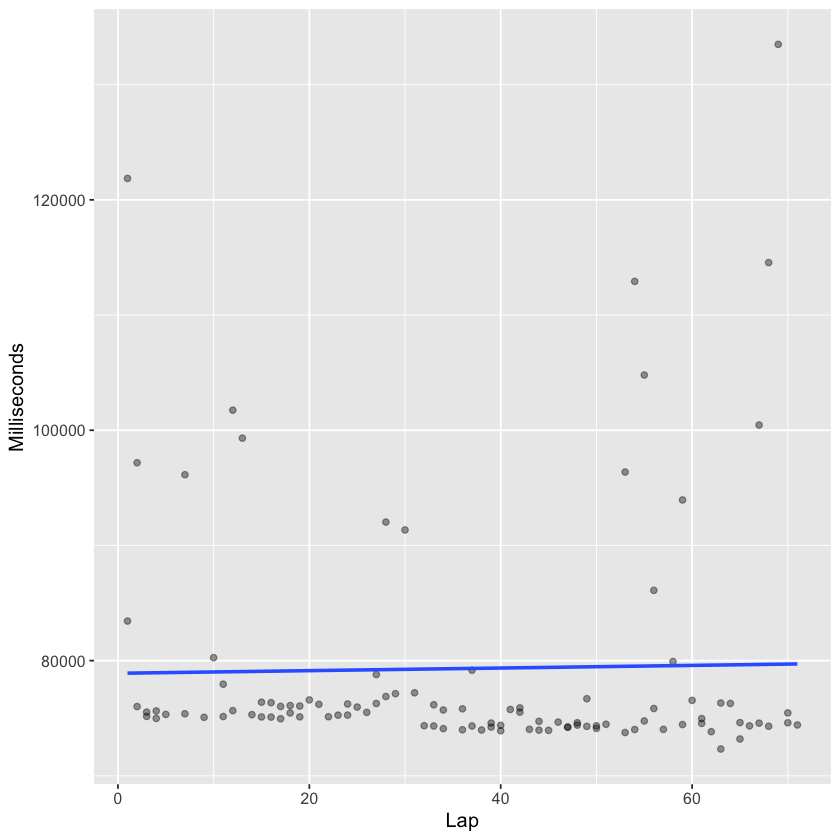

In [25]:
set.seed(2022)

#21.  Brazil

ln_brazil <- nor_laps %>%
                filter(raceId %in% brazil_race_ID) 

ln_brazil_clean <- ln_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_brazil_clean_ID <- ln_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_brazil_races <- nor_laps %>%
                    filter(raceId %in% ln_brazil_clean_ID)

formulaone_split <- initial_split(ln_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

raceId,n
<dbl>,<int>
1047,55
1030,54


`geom_smooth()` using formula 'y ~ x'



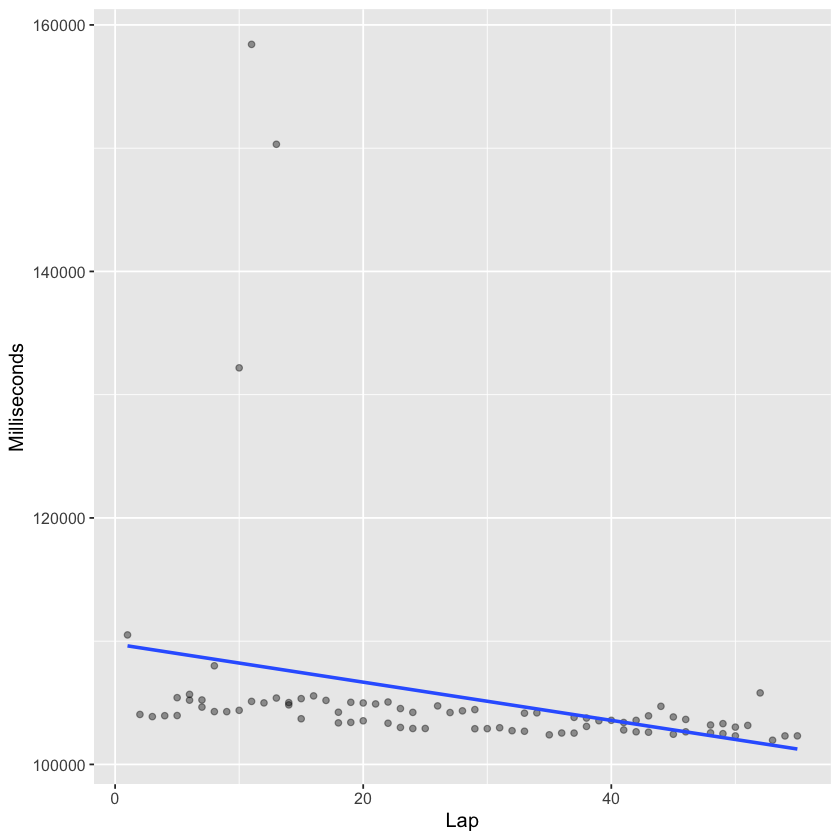

In [26]:
set.seed(2022)

#22.  Abu Dhabi

ln_uae <- nor_laps %>%
                filter(raceId %in% uae_race_ID) 

ln_uae_clean <- ln_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_uae_clean
ln_uae_clean_ID <- ln_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_uae_races <- nor_laps %>%
                    filter(raceId %in% ln_uae_clean_ID)

formulaone_split <- initial_split(ln_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [29]:
rmse_col
racetime_col

ln_merge <- merge(rmse_col, racetime_col)

ln_merge

write_csv(ln_merge, "final_race_data/ln_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,12072.387,1
rmse,standard,10420.583,2
rmse,standard,1489.471,3
rmse,standard,11616.939,4
rmse,standard,7419.198,5
rmse,standard,5481.114,6
rmse,standard,5868.081,7
rmse,standard,14098.061,8
rmse,standard,13179.680,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5775007,96.25011,1.604169,1
5592350,93.20583,1.553430,2
5270622,87.84370,1.464062,3
5577176,92.95293,1.549215,4
5756492,95.94153,1.599026,5
5635079,93.91799,1.565300,6
6106461,101.77435,1.696239,7
5807106,96.78511,1.613085,8
5628945,93.81575,1.563596,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,12072.387,5775007,96.25011,1.604169
2,rmse,standard,10420.583,5592350,93.20583,1.553430
3,rmse,standard,1489.471,5270622,87.84370,1.464062
4,rmse,standard,11616.939,5577176,92.95293,1.549215
5,rmse,standard,7419.198,5756492,95.94153,1.599026
6,rmse,standard,5481.114,5635079,93.91799,1.565300
7,rmse,standard,5868.081,6106461,101.77435,1.696239
8,rmse,standard,14098.061,5807106,96.78511,1.613085
9,rmse,standard,13179.680,5628945,93.81575,1.563596
